# Scaling Numeric Data
Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import pandas as pd
from wrangle import wrangle_telco
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [19]:
import warnings
warnings.filterwarnings("ignore")

### Exercise 1
Apply the scalers we talked about in this lesson to your data and visualize the results in a way you find helpful.

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [4]:
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.25, random_state=123)

train.shape, validate.shape, test.shape

((1017, 4), (339, 4), (339, 4))

In [5]:
columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']

In [31]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [32]:
scaler.fit(train[['monthly_charges']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [33]:
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])

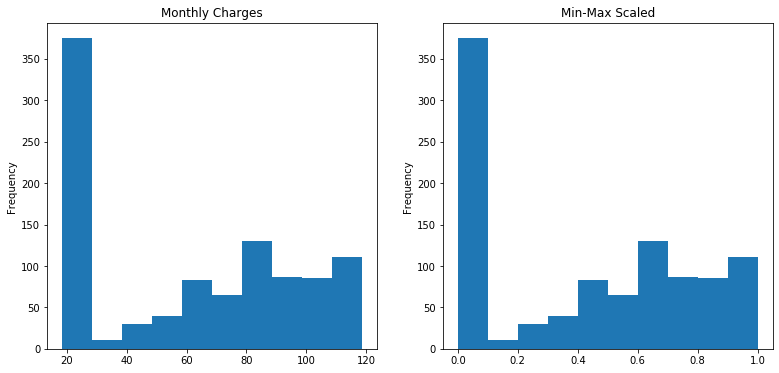

In [34]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Monthly Charges')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Min-Max Scaled')
plt.show()

In [20]:
scaler.fit(train[['total_charges']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])

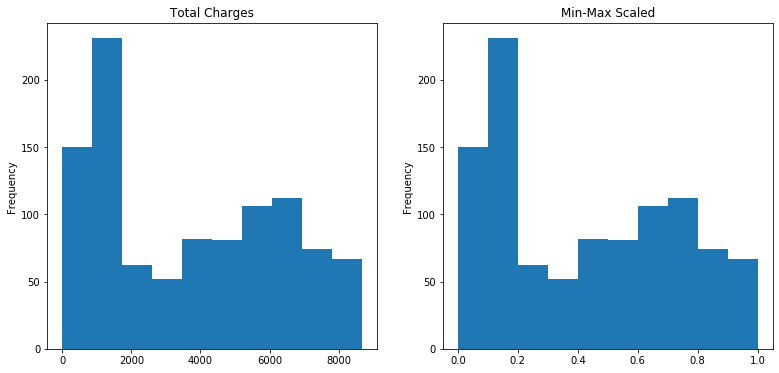

In [35]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Total Charges')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Min-Max Scaled')
plt.show()

In [36]:
scaler.fit(train[['tenure']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [37]:
train['tenure_scaled'] = scaler.transform(train[['tenure']])
validate['tenure_scaled'] = scaler.transform(validate[['tenure']])
test['tenure_scaled'] = scaler.transform(test[['tenure']])

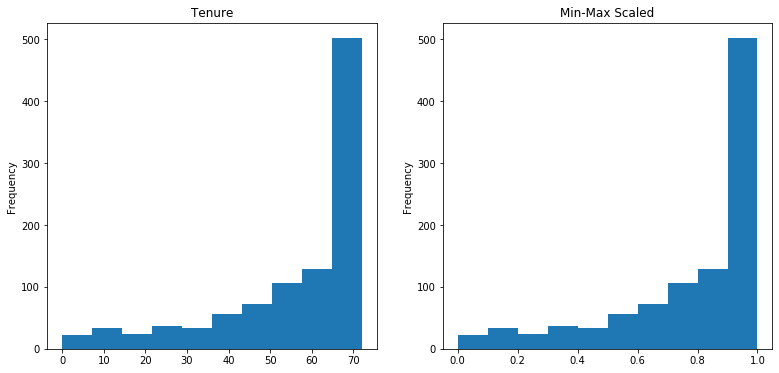

In [38]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tenure.plot.hist(title='Tenure')
plt.subplot(122)
train.tenure_scaled.plot.hist(title='Min-Max Scaled')
plt.show()

### Exercise 2
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [51]:
original = sklearn.preprocessing.LabelEncoder.inverse_transform(train.monthly_charges_scaled)

TypeError: inverse_transform() missing 1 required positional argument: 'y'

### Exercise 3
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [39]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

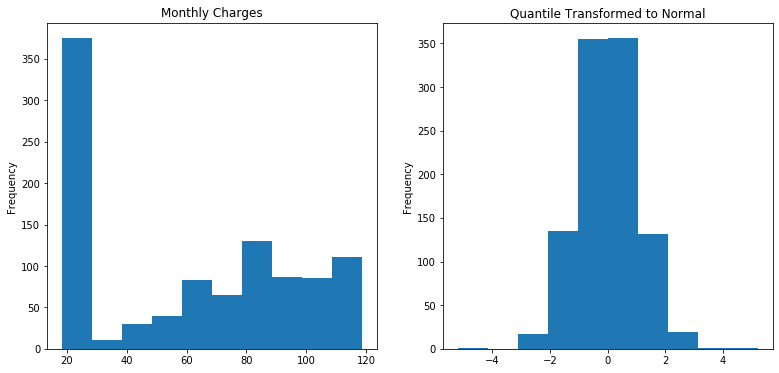

In [40]:
scaler.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Monthly Charges')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Quantile Transformed to Normal')
plt.show()

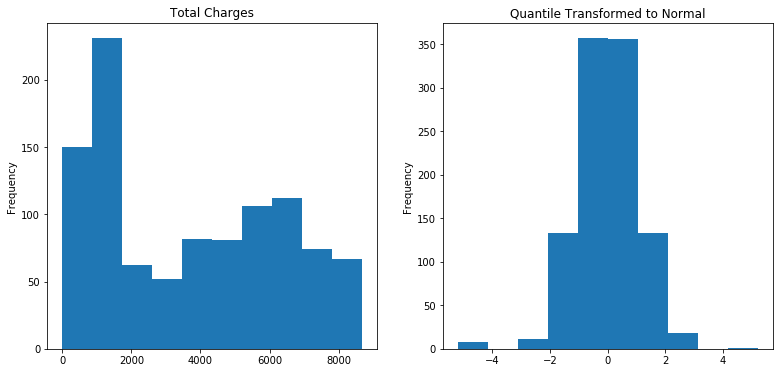

In [42]:
scaler.fit(train[['total_charges']])

train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Total Charges')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Quantile Transformed to Normal')
plt.show()

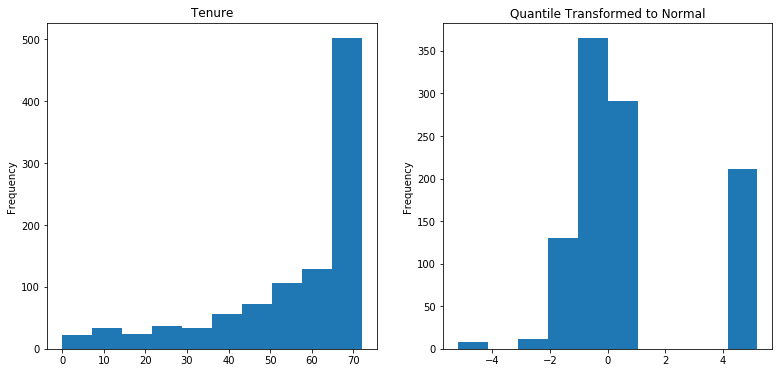

In [43]:
scaler.fit(train[['tenure']])

train['tenure_scaled'] = scaler.transform(train[['tenure']])
test['tenure_scaled'] = scaler.transform(test[['tenure']])
validate['tenure_scaled'] = scaler.transform(validate[['tenure']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tenure.plot.hist(title='Tenure')
plt.subplot(122)
train.tenure_scaled.plot.hist(title='Quantile Transformed to Normal')
plt.show()

### Exercise 4
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [46]:
scaler = sklearn.preprocessing.QuantileTransformer()

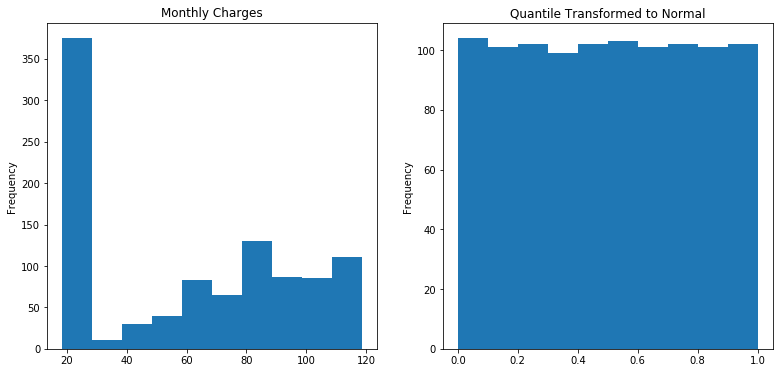

In [47]:
scaler.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Monthly Charges')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Quantile Transformed to Normal')
plt.show()

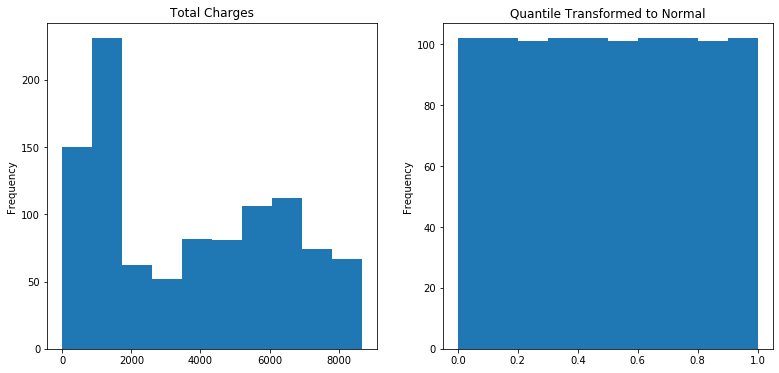

In [48]:
scaler.fit(train[['total_charges']])

train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Total Charges')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Quantile Transformed to Normal')
plt.show()

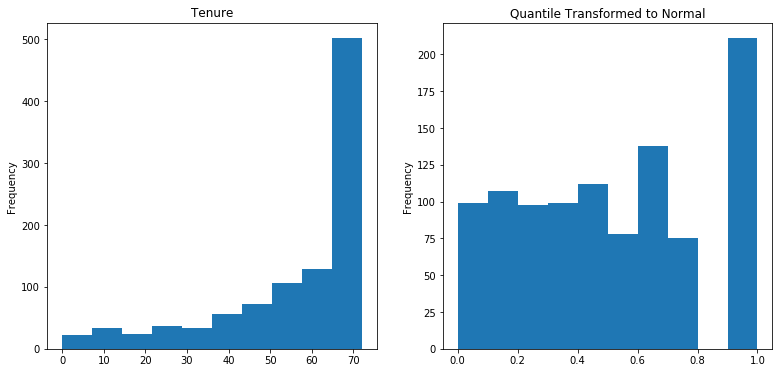

In [49]:
scaler.fit(train[['tenure']])

train['tenure_scaled'] = scaler.transform(train[['tenure']])
test['tenure_scaled'] = scaler.transform(test[['tenure']])
validate['tenure_scaled'] = scaler.transform(validate[['tenure']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tenure.plot.hist(title='Tenure')
plt.subplot(122)
train.tenure_scaled.plot.hist(title='Quantile Transformed to Normal')
plt.show()

The distirbution is no longer normal but placed in bins of equal amounts of values.

### Exercise 5
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [54]:
def scale_wrangle_telco(cached=True):
    df = wrangle_telco(cached)
    train, validate, test = telco_split(df)
    scaler = sklearn.preprocessing.MinMaxScaler()
    columns_to_scale = ['monthly_charges', 'tenure', 'total_charges']
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])
    
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [53]:
def telco_split(df):
    train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.25, random_state=123)
    return train, validate, test

In [52]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])

    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test